In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
dftrain= pd.read_csv('train_data.csv')
dftrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
dftest= pd.read_csv('test_data.csv')
dftest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [4]:
dftest.shape

(292, 80)

In [5]:
dftrain.shape

(1168, 81)

From the above code, we can see that the test data has one missing, ie the target column, 'SalePrice'.

So for better understanding and EDA purpose, we will combine both the train and test datasets. We can split the data again later at the time of model building

In [6]:
dftrain["dataset_type"]="Train"
dftest["dataset_type"]="Test"

In [7]:
df=pd.concat([dftrain,dftest],ignore_index=True)

In [8]:
df.shape

(1460, 82)

In [9]:
df["dataset_type"].value_counts()

Train    1168
Test      292
Name: dataset_type, dtype: int64

In [10]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
dataset_type        2
Length: 82, dtype: int64

In [11]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
dataset_type      object
Length: 82, dtype: object

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0,Train
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0,Train
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0,Train
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0,Train
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0,Train


In [13]:
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
SalePrice        292
dtype: int64

In [14]:
df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
SalePrice      292
dtype: int64

we have filtered the numeric columns with null values

In [15]:
df.select_dtypes(include=['object']).isnull().sum()[df.select_dtypes(include=['object']).isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

we have filtered the objects columns with null values

In [16]:
df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())

In [17]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

Dropping few columns as they are not of any use

In [18]:
df= df.drop(['Alley','Street','Utilities','PoolQC','Fence','MiscFeature','Id'],axis='columns')

In [19]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [20]:
df.MasVnrType.fillna('None',inplace=True)
df.BsmtQual.fillna('TA',inplace=True)
df.BsmtCond.fillna('TA',inplace=True)
df.BsmtExposure.fillna('No',inplace=True)
df.BsmtFinType1.fillna('Unf',inplace=True)
df.BsmtFinType2.fillna('Unf',inplace=True)
df.GarageType.fillna('Attchd',inplace=True)
df.GarageFinish.fillna('Unf',inplace=True)
df.GarageQual.fillna('TA',inplace=True)
df.GarageCond.fillna('TA',inplace=True)
df.Electrical.fillna('SBrkr',inplace=True)
df.FireplaceQu.fillna('Gd',inplace=True)

In [21]:
df.select_dtypes(include='object').isnull().sum()

MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dataset_type     0
dtype: int64

Now we have removed all the null values from the objects columns

In [22]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,120,RL,69.0,4928,IR1,Lvl,Inside,Gtl,NPkVill,Norm,...,0,0,0,0,2,2007,WD,Normal,128000.0,Train
1,20,RL,95.0,15865,IR1,Lvl,Inside,Mod,NAmes,Norm,...,0,224,0,0,10,2007,WD,Normal,268000.0,Train
2,60,RL,92.0,9920,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,...,0,0,0,0,6,2007,WD,Normal,269790.0,Train
3,20,RL,105.0,11751,IR1,Lvl,Inside,Gtl,NWAmes,Norm,...,0,0,0,0,1,2010,COD,Normal,190000.0,Train
4,20,RL,69.0,16635,IR1,Lvl,FR2,Gtl,NWAmes,Norm,...,0,0,0,0,6,2009,WD,Normal,215000.0,Train


# Exploratory Data Analysis

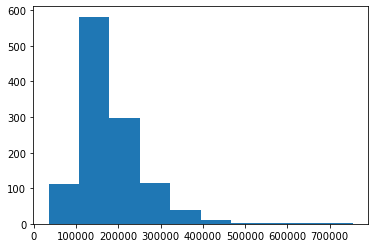

In [23]:
dftrain['SalePrice'].hist(grid=False)
plt.show()

755000 is the max value of sales price

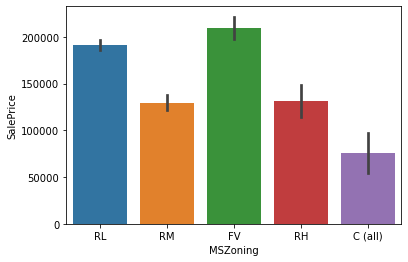

In [24]:
sns.barplot(x="MSZoning",y="SalePrice",data=df)
plt.show()

Floating Village Residential (FV) has the higher value of sales

<AxesSubplot:xlabel='YrSold', ylabel='count'>

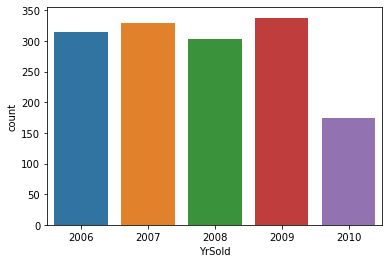

In [25]:
sns.countplot(df['YrSold'])

Year 2009 has the maximum number of sales

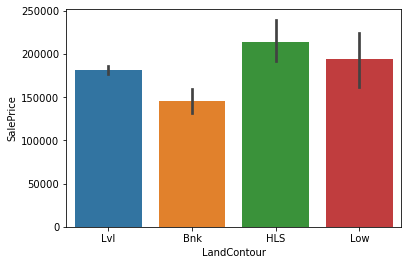

In [26]:
sns.barplot(x="LandContour",y="SalePrice",data=df)
plt.show()

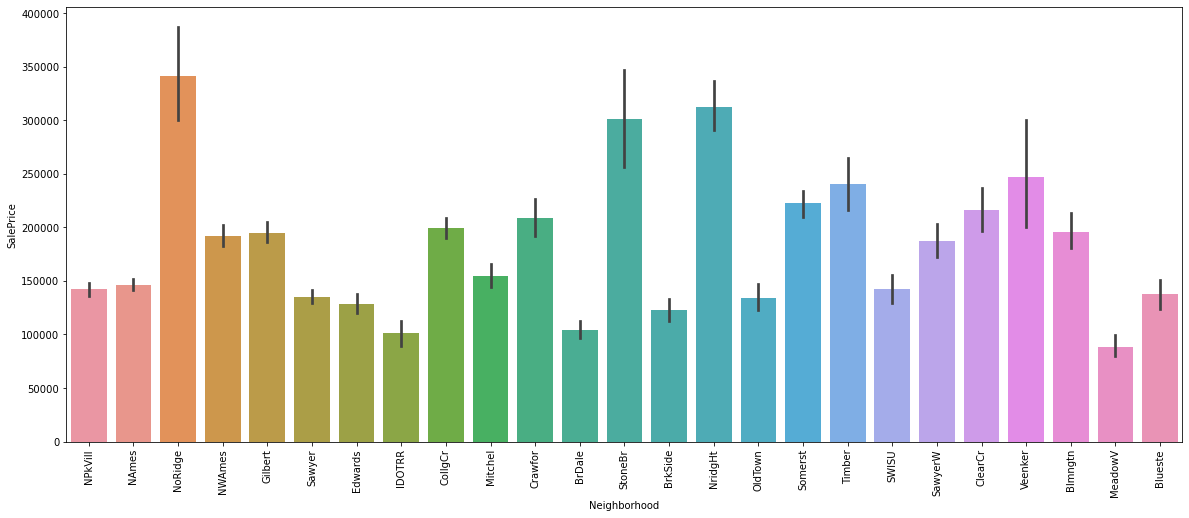

In [27]:
plt.figure(figsize=(20,8))
sns.barplot(x="Neighborhood",y="SalePrice",data=df)
plt.xticks(rotation=90)
plt.show()

North Ridge is in the Physical locations within Ames city limits has the higher count of saleprice

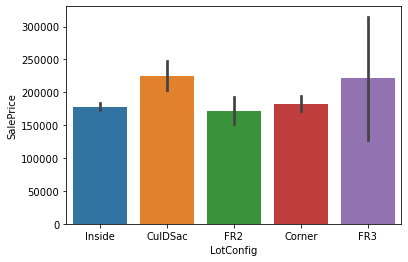

In [28]:
sns.barplot(x="LotConfig",y="SalePrice",data=df)
plt.show()

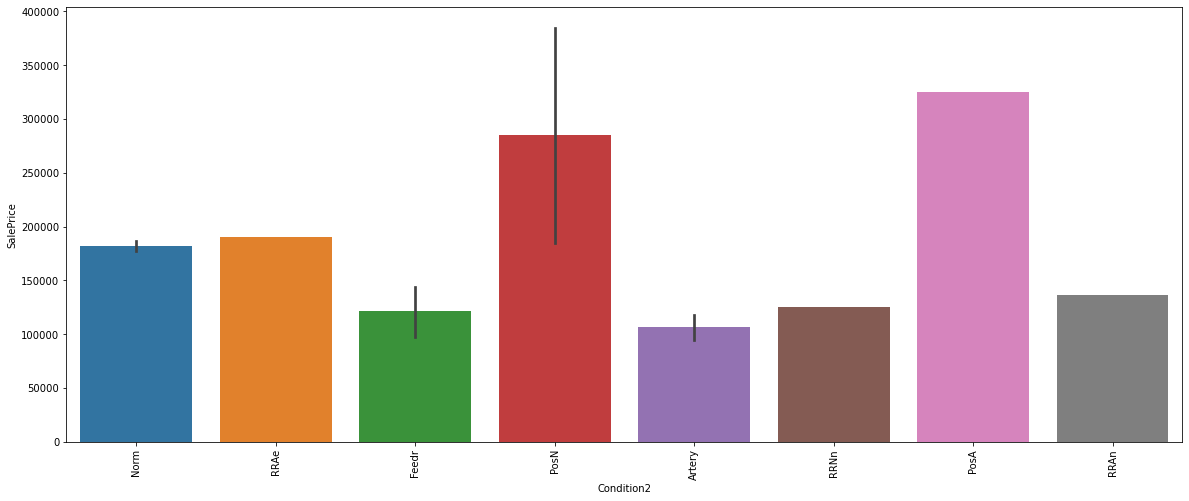

In [29]:
plt.figure(figsize=(20,8))
sns.barplot(x="Condition2",y="SalePrice",data=df)
plt.xticks(rotation=90)
plt.show()

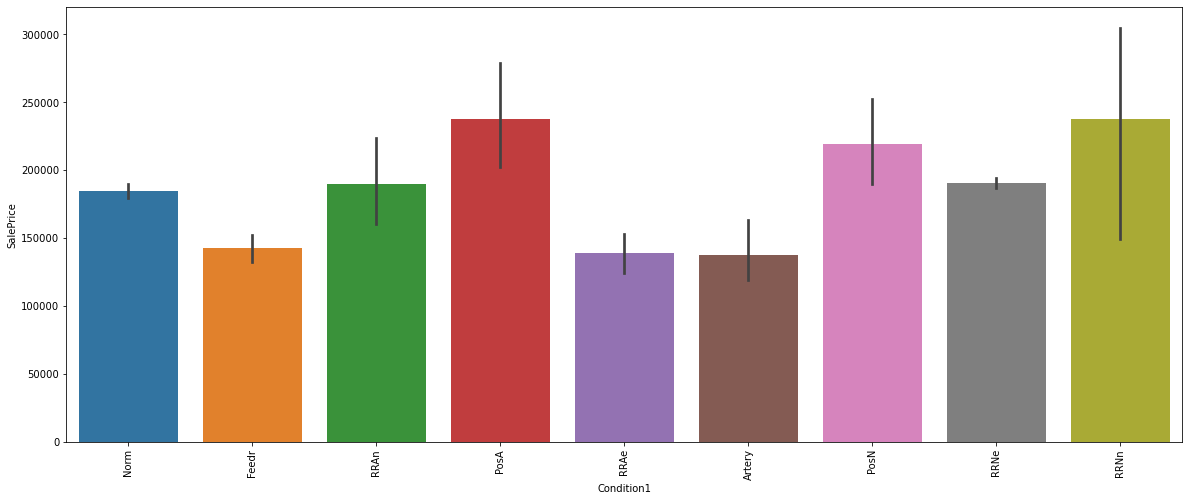

In [30]:
plt.figure(figsize=(20,8))
sns.barplot(x="Condition1",y="SalePrice",data=df)
plt.xticks(rotation=90)
plt.show()

PosA Adjacent to postive off-site feature RRNe Within 200' of East-West Railroad these are the two most valued Proximity to various conditions .

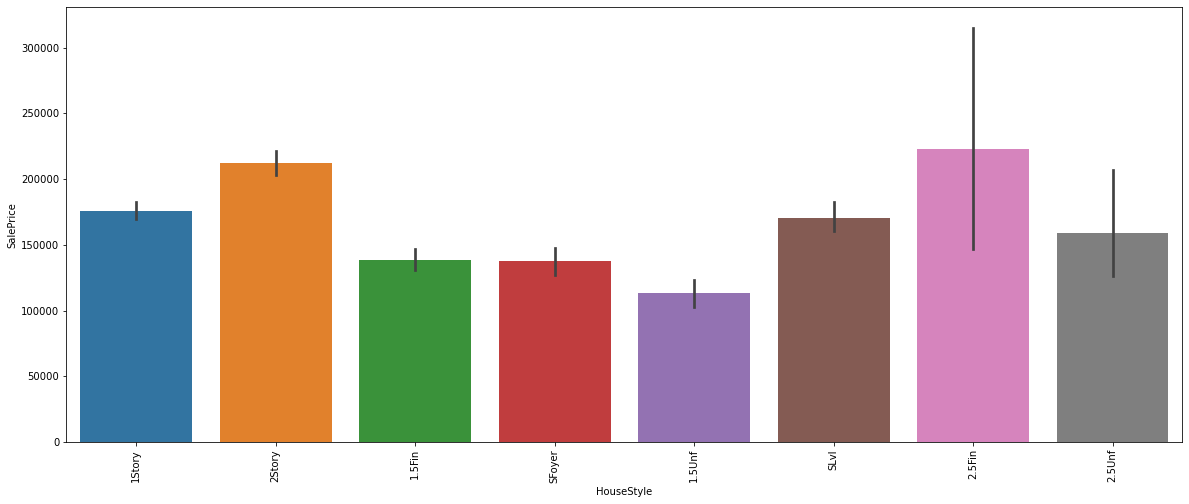

In [31]:
plt.figure(figsize=(20,8))
sns.barplot(x="HouseStyle",y="SalePrice",data=df)
plt.xticks(rotation=90)
plt.show()

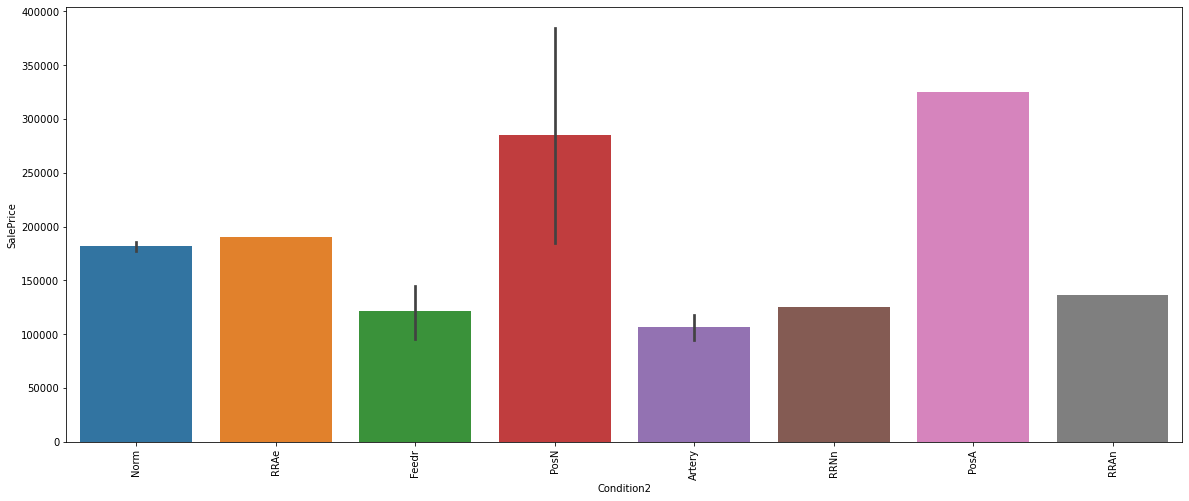

In [32]:
plt.figure(figsize=(20,8))
sns.barplot(x="Condition2",y="SalePrice",data=df)
plt.xticks(rotation=90)
plt.show()

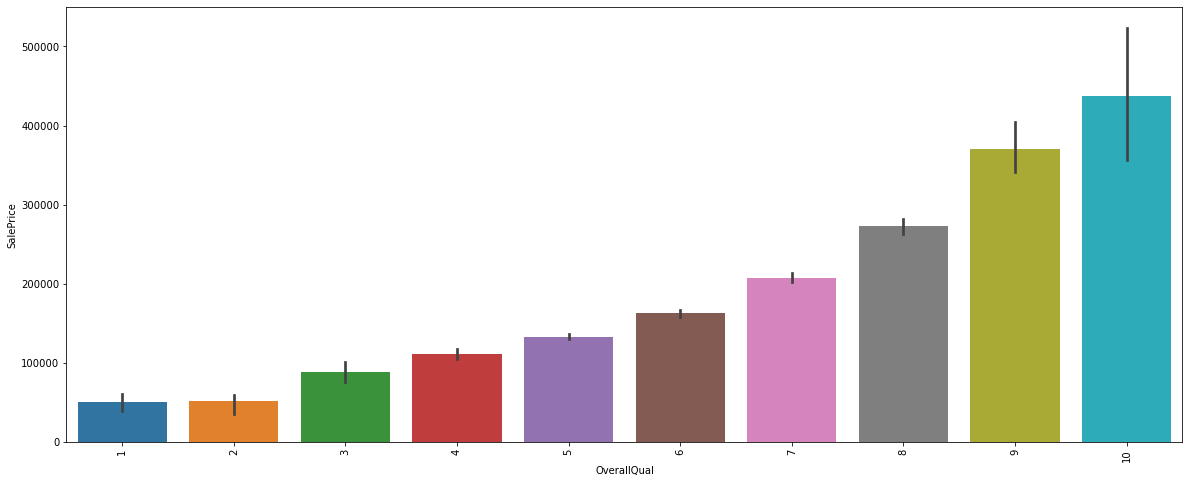

In [33]:
plt.figure(figsize=(20,8))
sns.barplot(x="OverallQual",y="SalePrice",data=df)
plt.xticks(rotation=90)
plt.show()

Very Excellent class value has the higher quality and hence higher price values. and the graph shows the slope as the quality increases the Sales Price increases.

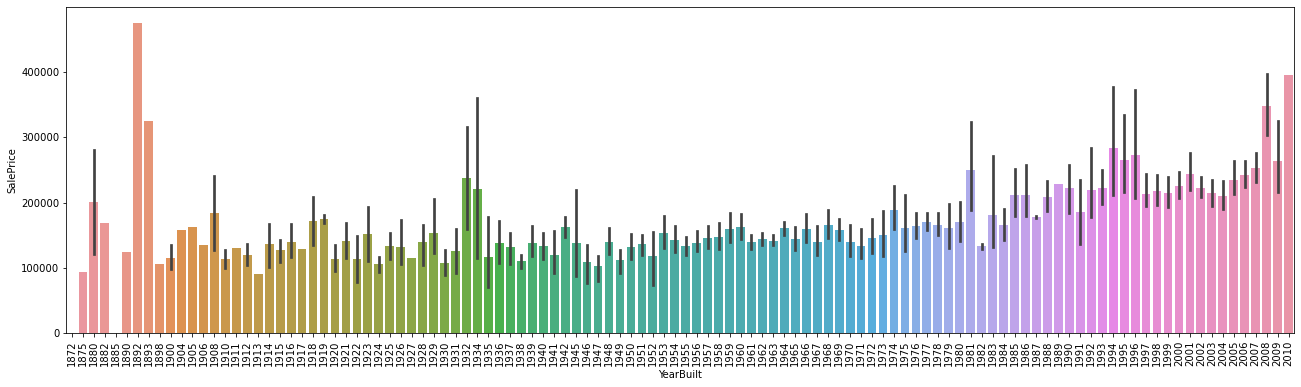

In [34]:
plt.figure(figsize=(22,6))
sns.barplot(x="YearBuilt",y="SalePrice",data=df)
plt.xticks(rotation=90)
plt.show()

Year 2010 and year 1892 has the max price in sales .

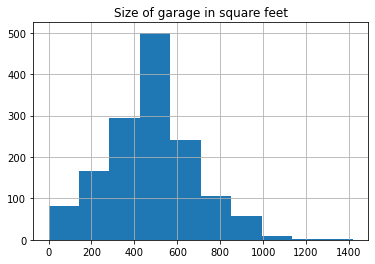

In [35]:
df["GarageArea"].hist(grid=True)
plt.title("Size of garage in square feet")
plt.show()

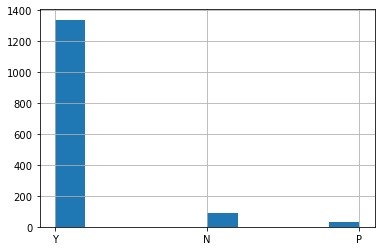

In [36]:
df["PavedDrive"].hist(grid=True)
plt.show()

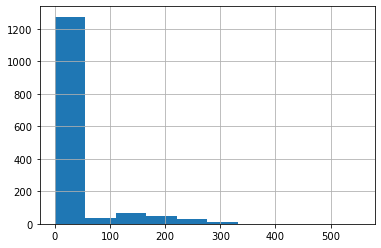

In [37]:
df["EnclosedPorch"].hist(grid=True)
plt.show()

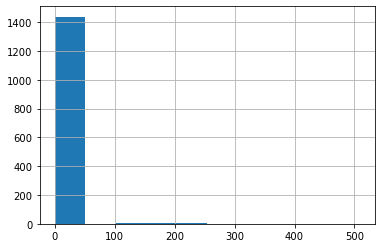

In [38]:
df["3SsnPorch"].hist(grid=True)
plt.show()

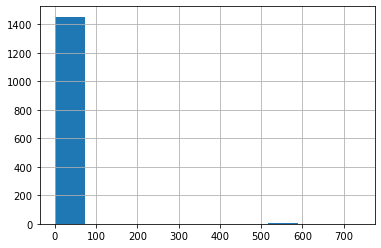

In [39]:
df["PoolArea"].hist(grid=True)
plt.show()

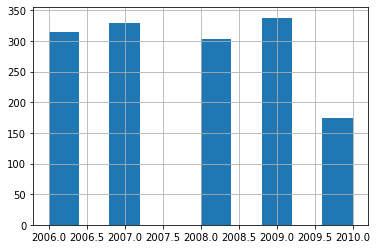

In [40]:
df["YrSold"].hist(grid=True)
plt.show()

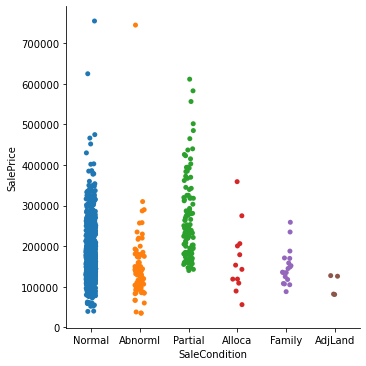

In [41]:
sns.catplot(x='SaleCondition',y='SalePrice',data = df.sort_values("SalePrice", ascending = False))

In [42]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.060775
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.323828
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.249499
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.789185
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.065642
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.514408
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507831
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.460535
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.362874
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.010151


<AxesSubplot:>

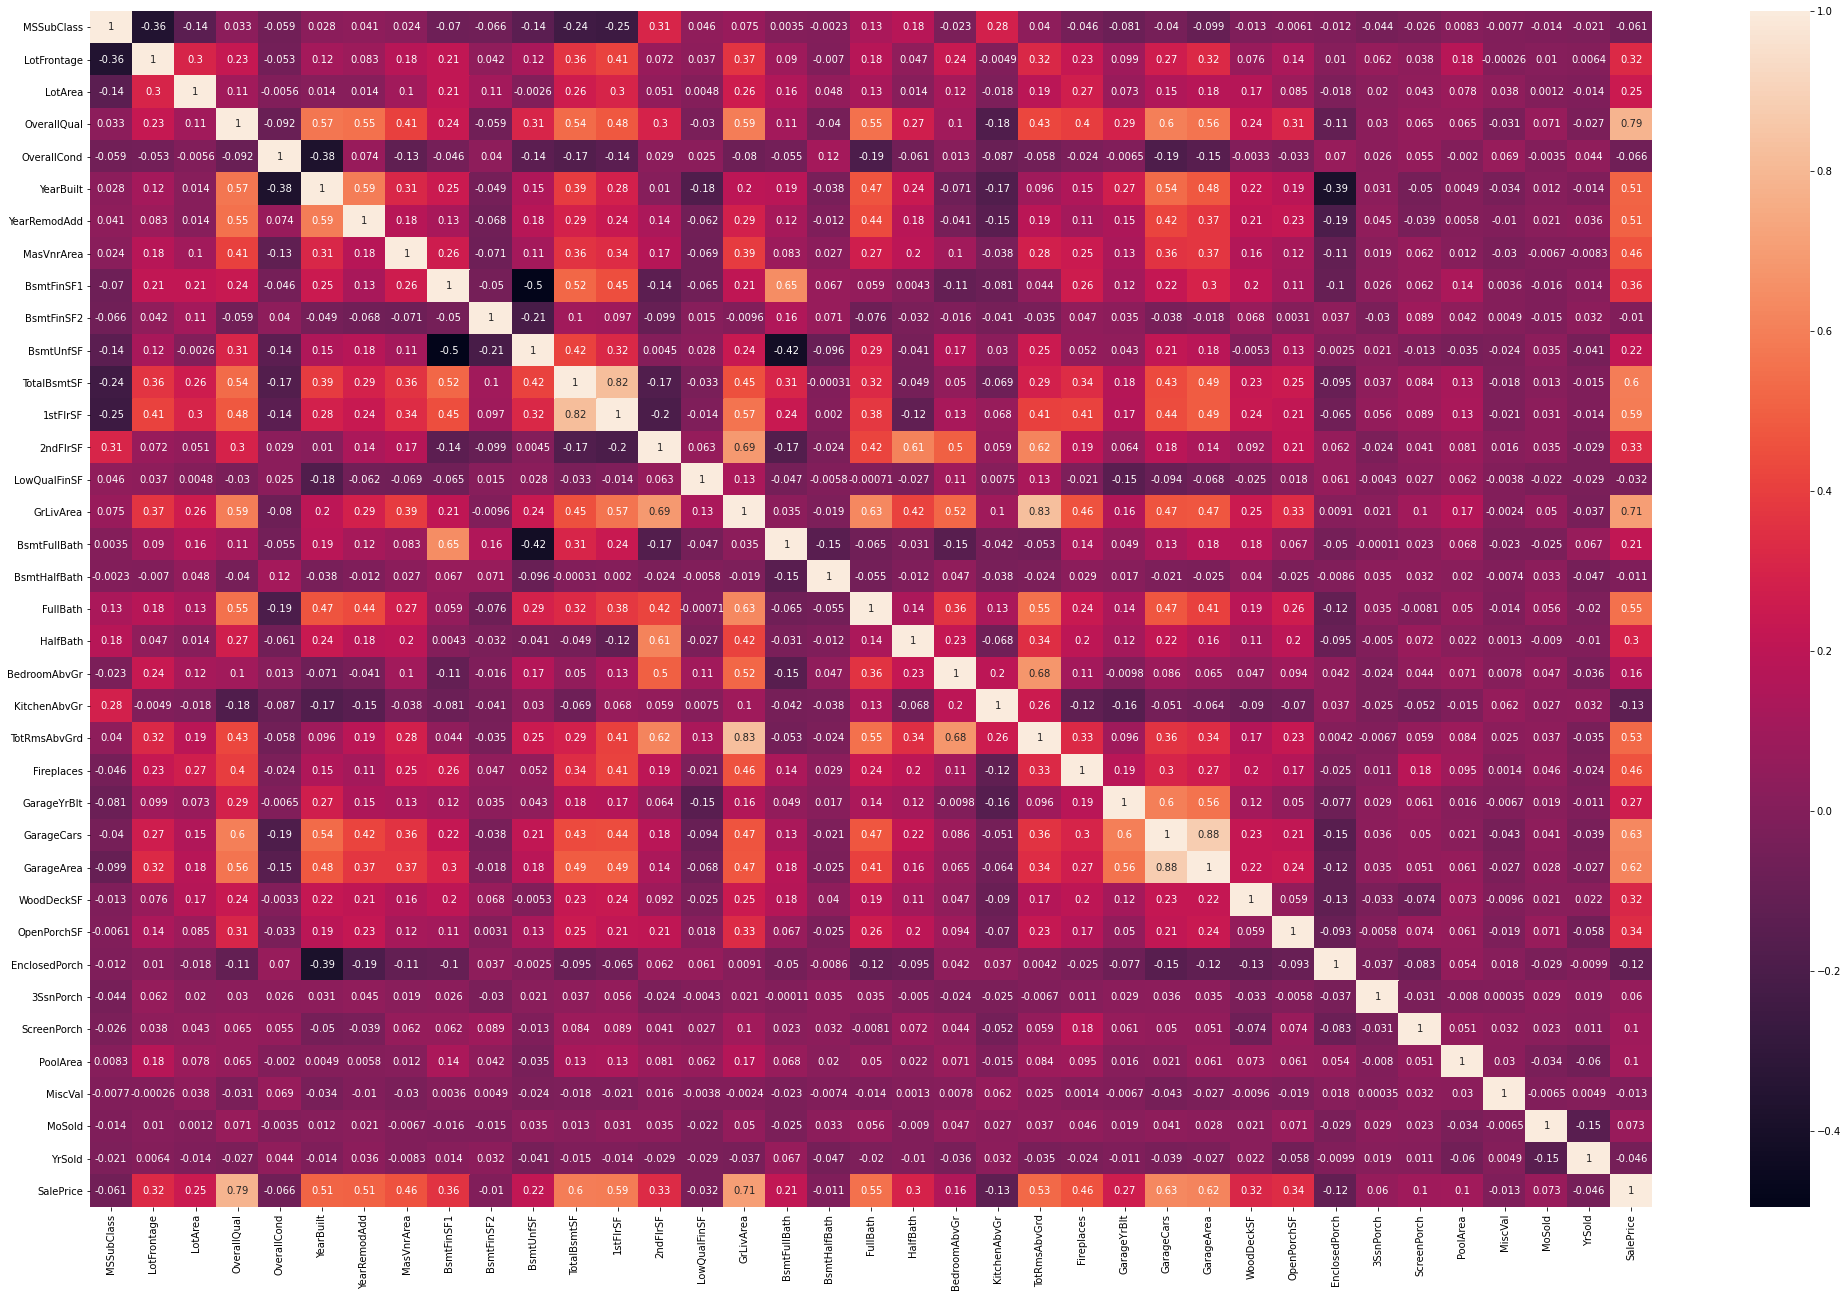

In [43]:
plt.figure(figsize=(35,22))
sns.heatmap(df.corr(), annot=True)

In [44]:
df.select_dtypes(include=['int64','float'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,69.0,4928,6,5,1976,1976,0.0,120,0,...,0,205,0,0,0,0,0,2,2007,128000.0
1,20,95.0,15865,8,6,1970,1970,0.0,351,823,...,81,207,0,0,224,0,0,10,2007,268000.0
2,60,92.0,9920,7,5,1996,1997,0.0,862,0,...,180,130,0,0,0,0,0,6,2007,269790.0
3,20,105.0,11751,6,6,1977,1977,480.0,705,0,...,0,122,0,0,0,0,0,1,2010,190000.0
4,20,69.0,16635,6,7,1977,2000,126.0,1246,0,...,240,0,0,0,0,0,0,6,2009,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,78.0,10206,8,5,2007,2007,468.0,33,0,...,144,99,0,0,0,0,0,10,2008,NaN
1456,20,57.0,9245,5,5,1994,1995,0.0,686,0,...,0,0,0,0,0,0,0,2,2008,NaN
1457,20,69.0,11241,6,7,1970,1970,180.0,578,0,...,0,0,0,0,0,0,700,3,2010,NaN
1458,50,50.0,5000,6,7,1947,1950,0.0,399,0,...,0,24,36,0,0,0,0,10,2006,NaN


In [45]:
df.select_dtypes(include=['object'])

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,dataset_type
0,RL,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,Train
1,RL,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,...,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal,Train
2,RL,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal,Train
3,RL,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,...,Typ,TA,Attchd,RFn,TA,TA,Y,COD,Normal,Train
4,RL,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,...,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,...,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,Test
1456,RL,IR2,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal,Test
1457,RL,IR1,Lvl,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,...,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal,Test
1458,RM,Reg,Lvl,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal,Test


Here, some columns have some kind of order in them, hence it is ordinal in nature

In [46]:
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df['FireplaceQu'] = df.FireplaceQu.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['dataset_type'] = df.dataset_type.map({'Train':0,'Test':1})

In [47]:
balance= df.filter(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'], axis=1)
balance

,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
0,RL,Lvl,Inside,NPkVill,Norm,Norm,TwnhsE,1Story,Gable,CompShg,...,Plywood,None,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1,RL,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Flat,Tar&Grv,...,Wd Sdng,None,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
2,RL,Lvl,CulDSac,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,...,MetalSd,None,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
3,RL,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,...,Plywood,BrkFace,CBlock,GasA,SBrkr,Typ,Attchd,Y,COD,Normal
4,RL,Lvl,FR2,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,...,CmentBd,Stone,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Lvl,Inside,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,...,VinylSd,Stone,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1456,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,...,VinylSd,None,PConc,GasA,SBrkr,Typ,Detchd,Y,WD,Normal
1457,RL,Lvl,CulDSac,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,...,Wd Sdng,BrkFace,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1458,RM,Lvl,Corner,BrkSide,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,...,CmentBd,None,CBlock,GasA,SBrkr,Typ,Detchd,Y,WD,Normal


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
LE=LabelEncoder()
for column in balance:
    df.loc[:,column] = LE.fit_transform(df.loc[:,column])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,120,3,69.0,4928,0,3,4,0,13,2,...,0,0,0,0,2,2007,8,4,128000.0,0
1,20,3,95.0,15865,0,3,4,1,12,2,...,0,224,0,0,10,2007,8,4,268000.0,0
2,60,3,92.0,9920,0,3,1,0,15,2,...,0,0,0,0,6,2007,8,4,269790.0,0
3,20,3,105.0,11751,0,3,4,0,14,2,...,0,0,0,0,1,2010,0,4,190000.0,0
4,20,3,69.0,16635,0,3,2,0,14,2,...,0,0,0,0,6,2009,8,4,215000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,3,78.0,10206,3,3,4,0,21,2,...,0,0,0,0,10,2008,8,4,NaN,1
1456,20,3,57.0,9245,1,3,4,0,5,2,...,0,0,0,0,2,2008,8,4,NaN,1
1457,20,3,69.0,11241,0,3,1,0,12,2,...,0,0,0,700,3,2010,8,4,NaN,1
1458,50,4,50.0,5000,3,3,0,0,3,1,...,0,0,0,0,10,2006,8,4,NaN,1


In [51]:
df['LotShape'] = df['LotShape'].fillna(0)
df['LandSlope'] = df['LandSlope'].fillna(0)
df['dataset_type'] = df['dataset_type'].fillna(0)
df['SalePrice'] = df['SalePrice'].fillna(0)
df['ExterQual'] = df['ExterQual'].fillna(0)
df['ExterCond'] = df['ExterCond'].fillna(0)
df['BsmtQual'] = df['BsmtQual'].fillna(0)
df['BsmtCond'] = df['BsmtCond'].fillna(0)
df['BsmtExposure'] = df['BsmtExposure'].fillna(0)
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(0)
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(0)
df['HeatingQC'] = df['HeatingQC'].fillna(0)
df['CentralAir'] = df['CentralAir'].fillna(0)
df['KitchenQual'] = df['KitchenQual'].fillna(0)
df['FireplaceQu'] = df['FireplaceQu'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].fillna(0)
df['GarageQual'] = df['GarageQual'].fillna(0)
df['GarageCond'] = df['GarageCond'].fillna(0)

In [52]:
df.isnull().value_counts()

MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  dataset_type
False       False     False        False    False     False        False      False      False         False 

In [53]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,120,3,69.0,4928,0,3,4,0,13,2,...,0,0,0,0,2,2007,8,4,128000.0,0
1,20,3,95.0,15865,0,3,4,1,12,2,...,0,224,0,0,10,2007,8,4,268000.0,0
2,60,3,92.0,9920,0,3,1,0,15,2,...,0,0,0,0,6,2007,8,4,269790.0,0
3,20,3,105.0,11751,0,3,4,0,14,2,...,0,0,0,0,1,2010,0,4,190000.0,0
4,20,3,69.0,16635,0,3,2,0,14,2,...,0,0,0,0,6,2009,8,4,215000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,3,78.0,10206,3,3,4,0,21,2,...,0,0,0,0,10,2008,8,4,0.0,1
1456,20,3,57.0,9245,1,3,4,0,5,2,...,0,0,0,0,2,2008,8,4,0.0,1
1457,20,3,69.0,11241,0,3,1,0,12,2,...,0,0,0,700,3,2010,8,4,0.0,1
1458,50,4,50.0,5000,3,3,0,0,3,1,...,0,0,0,0,10,2006,8,4,0.0,1


# Binning

In [54]:
#Binning:
bins = [1860,1875,1890,1905,1920,1935,1950,1965,1980,1995,2010]
labels = [i for i in range(10)]
df['YearBuilt'] = pd.cut(df['YearBuilt'], bins=bins, labels=labels, include_lowest=True)

In [55]:
df['YearBuilt'] = df['YearBuilt'].astype(int)

In [56]:
#Binning:
bins = [0,1875,1890,1905,1920,1935,1950,1965,1980,1995,2010]
labels = [i for i in range(10)]
df['GarageYrBlt'] = pd.cut(df['GarageYrBlt'], bins=bins, labels=labels, include_lowest=True)

In [57]:
df['GarageYrBlt']= df['GarageYrBlt'].astype(int)

In [58]:
#Binning:
bins = [0,2006,2007,2008,2009,2010]
labels = [i for i in range(5)]
df['YrSold'] = pd.cut(df['YrSold'], bins=bins, labels=labels, include_lowest=True)

In [59]:
df['YrSold']= df['YrSold'].astype(int)

# Checking Outliers

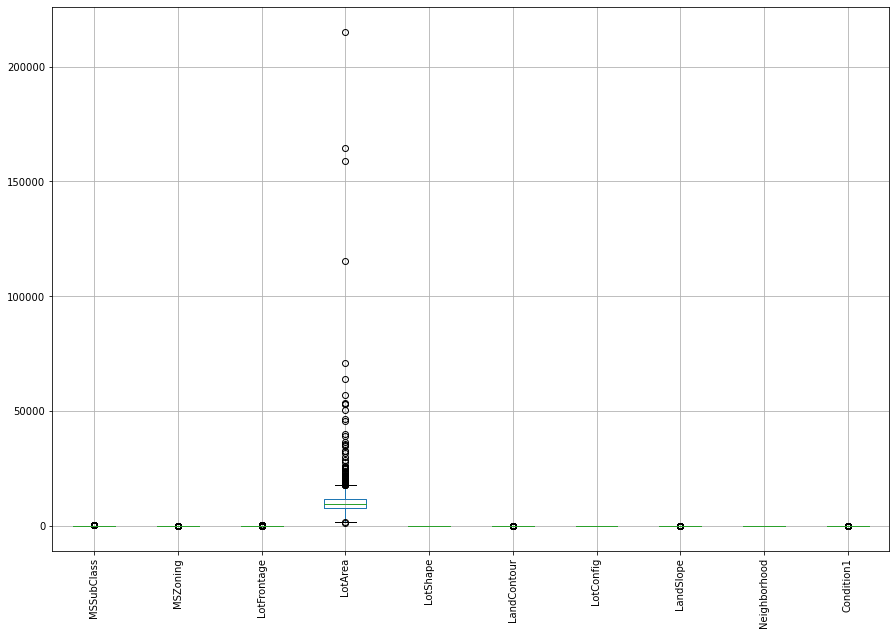

In [60]:
df.iloc[:,0:10].boxplot(figsize=[15,10])
plt.xticks(rotation=90)
plt.show()

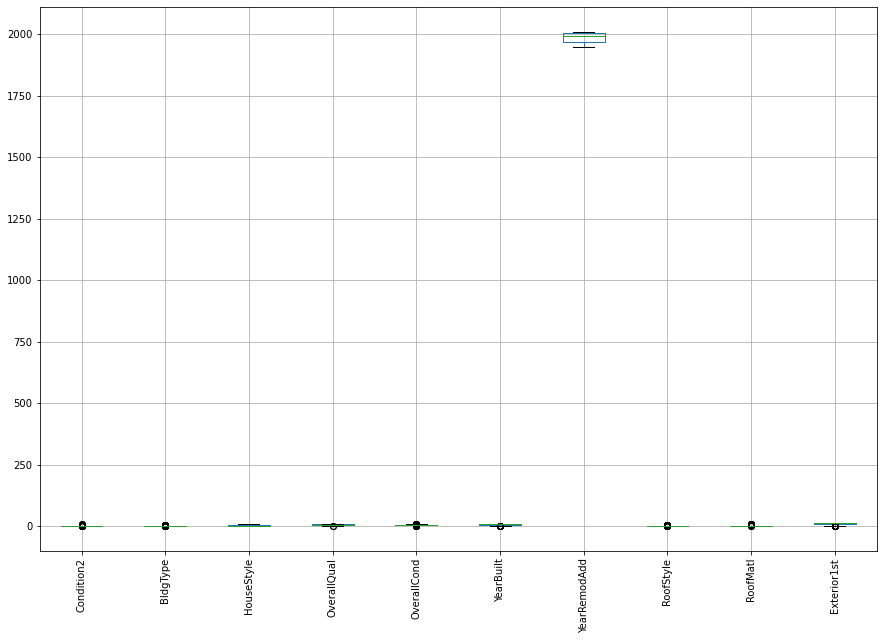

In [61]:
df.iloc[:,10:20].boxplot(figsize=[15,10])
plt.xticks(rotation=90)
plt.show()

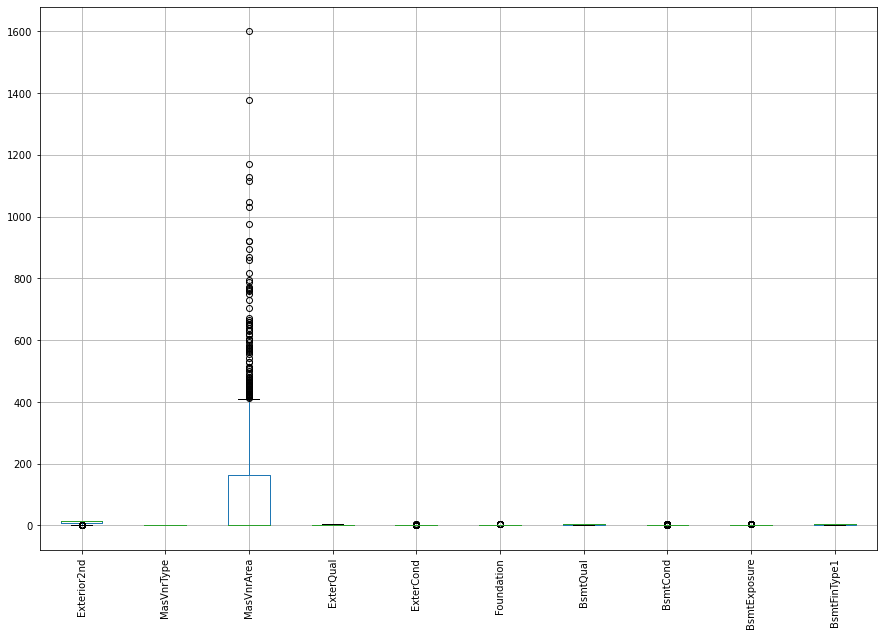

In [62]:
df.iloc[:,20:30].boxplot(figsize=[15,10])
plt.xticks(rotation=90)
plt.show()

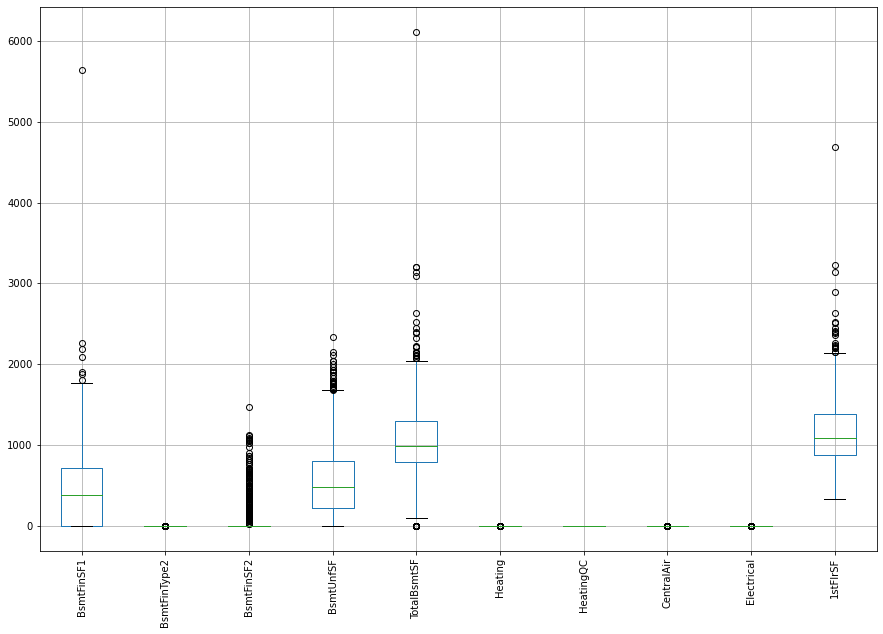

In [63]:
df.iloc[:,30:40].boxplot(figsize=[15,10])
plt.xticks(rotation=90)
plt.show()

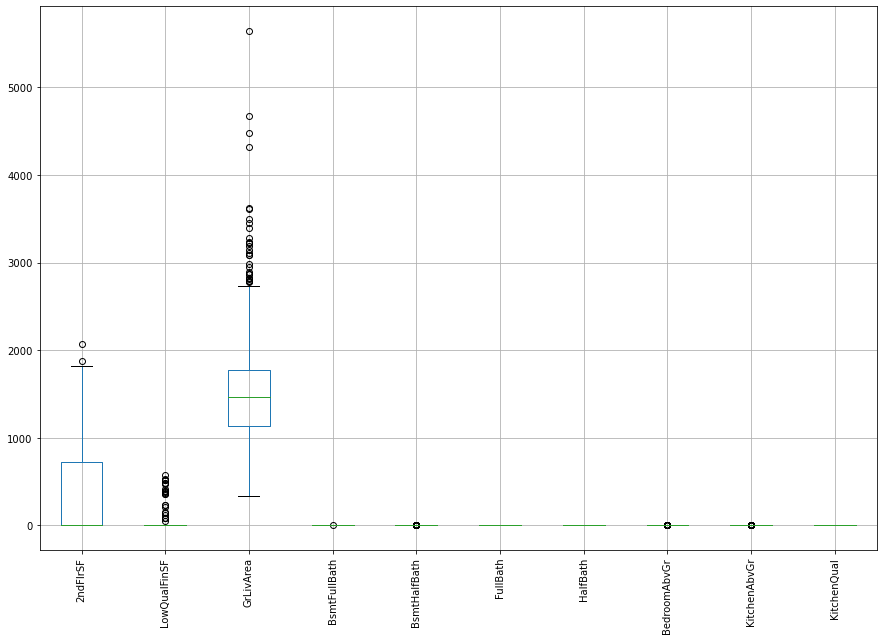

In [64]:
df.iloc[:,40:50].boxplot(figsize=[15,10])
plt.xticks(rotation=90)
plt.show()

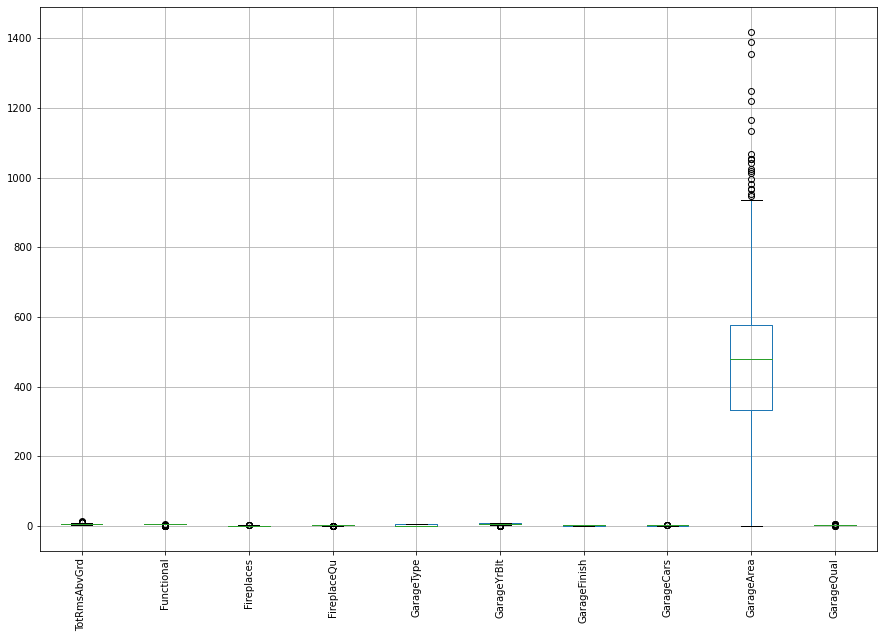

In [65]:
df.iloc[:,50:60].boxplot(figsize=[15,10])
plt.xticks(rotation=90)
plt.show()

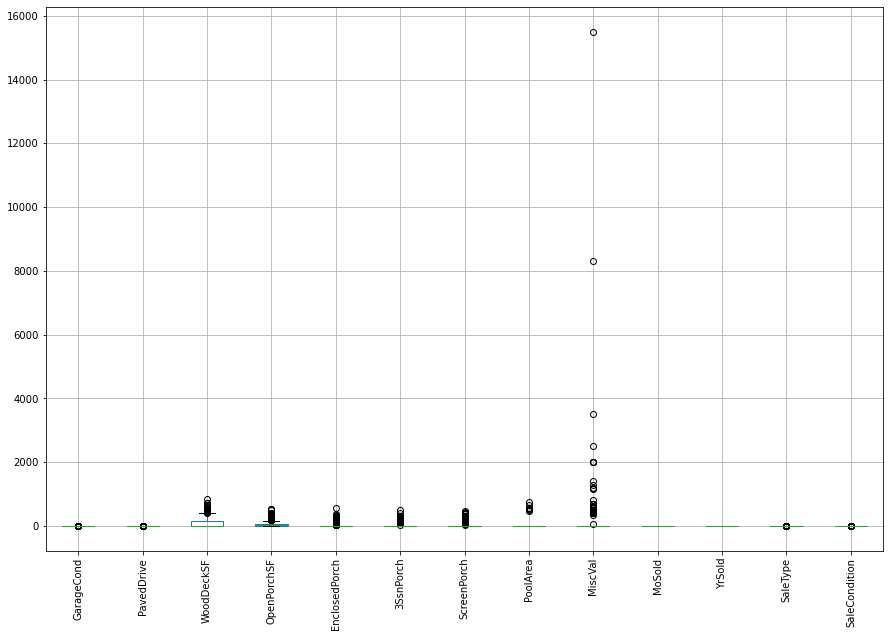

In [66]:
df.iloc[:,60:73].boxplot(figsize=[15,10])
plt.xticks(rotation=90)
plt.show()

MiscVal, GrLiveArea, LowQualityFinSF, GarageArea, TotalBsmtSF, LotArea, MasVsrArea, 1stFlrSF are the some of the columns which has outliers present in them.

In [67]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_zscore=df[(z<3).all(axis=1)]

In [68]:
df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,3.028767,69.863699,10516.828082,1.942466,2.777397,3.019178,0.062329,12.251370,2.031507,...,3.409589,15.060959,2.758904,43.489041,6.321918,1.815753,7.513014,3.770548,145181.604795,0.200000
std,42.300571,0.632017,22.027677,9981.264932,1.409156,0.707666,1.622634,0.276232,6.013735,0.868515,...,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,101382.116539,0.400137
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,3.000000,60.000000,7553.500000,0.000000,3.000000,2.000000,0.000000,7.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,8.000000,4.000000,94937.500000,0.000000
50%,50.000000,3.000000,69.000000,9478.500000,3.000000,3.000000,4.000000,0.000000,12.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,8.000000,4.000000,144076.000000,0.000000
75%,70.000000,3.000000,79.000000,11601.500000,3.000000,3.000000,4.000000,0.000000,17.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,8.000000,4.000000,196250.000000,0.000000
max,190.000000,4.000000,313.000000,215245.000000,3.000000,3.000000,4.000000,2.000000,24.000000,8.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,4.000000,8.000000,5.000000,755000.000000,1.000000


In [69]:
#Lets seprate the train and test
df_newtrain=df.loc[df["dataset_type"]==0]
df_newtest=df.loc[df["dataset_type"]==1]

In [70]:
df_newtest.drop(columns=["SalePrice"],inplace=True)

In [71]:
df_newtrain.drop(columns=["dataset_type"],inplace=True)
df_newtest.drop(columns=["dataset_type"],inplace=True)

In [72]:
#seprating input and output from df_newtrain
x=df_newtrain.drop(columns=["SalePrice"])
y=df_newtrain[["SalePrice"]]

In the above block of codes we have split the datset which was earlier concatinated in start. Now we need to do x,y split so we have done train and test datset split and x,y split for model process

In [73]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)
df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [74]:
x = df_skew
x.shape

(1168, 73)

In [75]:
y.shape

(1168, 1)

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
maximum_accuracy=0
maximum_randomstate=0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
 #  acc=accuracy_score(y_test,pred)
    acc=(r2_score(y_test,pred))
    if acc>maximum_accuracy:
        maximum_accuracy=acc
        maximum_randomstate=i
print("Best accuracy is  "  ,maximum_accuracy , "  at random_state:", maximum_randomstate)

Best accuracy is   0.8722552955039279   at random_state: 140


In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=140)

In [99]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("Accuracy score :  ", lr.score(x_train,y_train))
print("mean squared error : ", mean_squared_error(y_test,pred))
print("mean absolute error : ", mean_absolute_error(y_test,pred))
print("r2 Score : ", r2_score(y_test,pred))

Accuracy score :   0.8213234246452539
mean squared error :  691757925.9923393
mean absolute error :  19707.506079972773
r2 Score :  0.8722552955039279


In [100]:
# lets predict with Lasso first
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print("Accuracy score : ",ls.score(x_train,y_train))
print("mean squared error : ", mean_squared_error(y_test,pred))
print("mean absolute error : ",mean_absolute_error(y_test,pred))
print("r2 score: ",r2_score(y_test,pred))

Accuracy score :  0.8213234246394986
mean squared error :  691757056.7205957
mean absolute error :  19707.48676891729
r2 score:  0.8722554560295364


In [101]:
# Lets predict with Ridge now
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
pre=rd.predict(x_test)
print("Accuracy score : ",rd.score(x_train,y_train))
print("mean squared error : ",mean_squared_error(y_test,pre))
print("mean absolute error : ",mean_absolute_error(y_test,pre))
print("r2 score : ",r2_score(y_test,pre))

Accuracy score :  0.8213234246452409
mean squared error :  691757824.045911
mean absolute error :  19707.50478941513
r2 score :  0.8722553143300459


In [102]:
# now lastly lets predict Elasticnet
en=ElasticNet(alpha=0.0001)
en.fit(x_train,y_train)
preddd=en.predict(x_test)
print("Accuracy score : ",en.score(x_train,y_train))
print("mean squared error : ",mean_squared_error(y_test,preddd))
print("mean absolute error : ",mean_absolute_error(y_test,preddd))
print("r2 score : ",r2_score(y_test,pred))

Accuracy score :  0.8213234218055451
mean squared error :  691710405.7308168
mean absolute error :  19706.904115686328
r2 score :  0.8722554560295364


In [103]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rf.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",rf.score(x_train,y_train))
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.9784613384922712
Mean absolute error    : 17458.718717948715
Mean squared error     : 643990684.7064768
Root mean squared error: 25376.971543241263
r2 score :  0.8810763178491386


In [104]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
gbr.score(x_train,y_train)
print("Score       : ",gbr.score(x_train,y_train))
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.9719628188682605
Mean absolute error    : 15466.27027578889
Mean squared error     : 500001357.1843611
Root mean squared error: 22360.710122542197
r2 score :  0.9076663624352046


In [105]:
adb=AdaBoostRegressor()
adb.fit(x_train,y_train)
pred=adb.predict(x_test)
adb.score(x_train,y_train)
print("Score       : ",adb.score(x_train,y_train))
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.8674124877672186
Mean absolute error    : 24545.614100998377
Mean squared error     : 1039856374.8510512
Root mean squared error: 32246.804102903767
r2 score :  0.8079730779619929


# Cross Validation Score

In [107]:
scr=cross_val_score(lr,x,y,cv=5,scoring="r2")
print("Cross Validation Score of LinearRegression Model is : ", scr.mean())

Cross Validation Score of LinearRegression Model is :  0.6941501618681617


In [108]:
scr=cross_val_score(ls,x,y,cv=5,scoring="r2")
print("Cross Validation Score of Lasso Model is : ", scr.mean())

Cross Validation Score of Lasso Model is :  0.7512228849384132


In [109]:
scr=cross_val_score(rd,x,y,cv=5,scoring="r2")
print("Cross Validation Score of RidgeRegression Model is : ", scr.mean())

Cross Validation Score of RidgeRegression Model is :  0.6953426837794887


In [110]:
scr=cross_val_score(en,x,y,cv=5,scoring="r2")
print("Cross Validation Score of ElasticNet Model is : ", scr.mean())

Cross Validation Score of ElasticNet Model is :  0.7512478248603199


In [111]:
scr=cross_val_score(rf,x,y,cv=5,scoring="r2")
print("Cross Validation Score of RandomForestRegressor Model is : ", scr.mean())

Cross Validation Score of RandomForestRegressor Model is :  0.851249352806755


In [112]:
scr=cross_val_score(gbr,x,y,cv=5,scoring='r2')
print("Cross Validation Score of GradientBoostingRegressor Model is : ", scr.mean())

Cross Validation Score of GradientBoostingRegressor Model is :  0.866568957942971


In [113]:
scr=cross_val_score(adb,x,y,cv=5,scoring="r2")
print("Cross Validation Score of AdaBoostRegressor Model is : ", scr.mean())

Cross Validation Score of AdaBoostRegressor Model is :  0.7995160664266898


Above various models shows that RandomForest and GradiantBooster Regressor are the best with good scores and R2 score values

# Hyper Parameter Tunning

In [117]:
parameters={"bootstrap":[True,False], "criterion":["mse", "mae"],}
gcv=GridSearchCV(RandomForestRegressor(), parameters,cv=5,scoring='r2') #Tuning
gcv.fit(x_train,y_train)
mod=RandomForestRegressor(bootstrap= True, criterion='mae',random_state=maximum_randomstate)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

88.8944037274142


# Saving the model in pickle format

In [123]:
import pickle
filename='Housing Project.pkl'
pickle.dump(gsv,open(filename,"wb"))

# Conclusion

In [126]:
prediction=model.predict(x_test)
print(r2_score(y_test,prediction)*100)
prediction=pd.DataFrame(prediction)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
conclusion=pd.DataFrame([model.predict(x_test)[:]],index=["Predicted","Original"])
conclusion